In [31]:
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import psycopg2


conn = psycopg2.connect(
    host="localhost",
    dbname="postgres",
    user="postgres",
    password="postgres"
)

cur = conn.cursor()

df = pd.read_csv('clients.csv')

In [32]:
df

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,6/5/2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10/12/2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,IND66827,Earl Hall,82,8760,9/10/2014,Joshua Bennett,American,Accounting Assistant III,High,Gold,...,1089957.03,532867.88,657849.62,12947.31,1238859.91,1,3,3,2,4
2996,IND40556,Billy Williamson,44,32837,5/2/2009,Dennis Ruiz,European,Paralegal,Mid,Gold,...,136891.32,56581.74,93195.61,23205.69,277171.07,1,2,3,2,5
2997,IND72414,Victor Black,70,36088,29-12-2009,Joshua Ryan,American,Statistician IV,Low,Jade,...,214860.89,158726.06,35539.15,30291.81,502947.22,2,2,3,2,6
2998,IND46652,Andrew Ford,56,24871,13-02-2006,Nicholas Cunningham,European,Human Resources Assistant III,Mid,Jade,...,742630.22,404638.26,56411.33,6413.14,1538368.60,3,1,3,2,7


In [33]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
)


In [34]:
df

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,genderid,iaid
0,IND81288,Raymond Mills,24,34324,6/5/2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10/12/2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,IND66827,Earl Hall,82,8760,9/10/2014,Joshua Bennett,American,Accounting Assistant III,High,Gold,...,1089957.03,532867.88,657849.62,12947.31,1238859.91,1,3,3,2,4
2996,IND40556,Billy Williamson,44,32837,5/2/2009,Dennis Ruiz,European,Paralegal,Mid,Gold,...,136891.32,56581.74,93195.61,23205.69,277171.07,1,2,3,2,5
2997,IND72414,Victor Black,70,36088,29-12-2009,Joshua Ryan,American,Statistician IV,Low,Jade,...,214860.89,158726.06,35539.15,30291.81,502947.22,2,2,3,2,6
2998,IND46652,Andrew Ford,56,24871,13-02-2006,Nicholas Cunningham,European,Human Resources Assistant III,Mid,Jade,...,742630.22,404638.26,56411.33,6413.14,1538368.60,3,1,3,2,7


In [35]:
username = "postgres"      
password = "postgres" 
host = "localhost"         
port = "5432"             
database = "postgres"    

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name = "clients"   
df.to_sql(table_name, engine, if_exists="replace", index=False)


1000

In [36]:
df.describe()

,age,location_id,estimated_income,superannuation_savings,amount_of_credit_cards,credit_card_balance,bank_loans,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,genderid,iaid
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_id                 3000 non-null   object 
 1   name                      3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   location_id               3000 non-null   int64  
 4   joined_bank               3000 non-null   object 
 5   banking_contact           3000 non-null   object 
 6   nationality               3000 non-null   object 
 7   occupation                3000 non-null   object 
 8   fee_structure             3000 non-null   object 
 9   loyalty_classification    3000 non-null   object 
 10  estimated_income          3000 non-null   float64
 11  superannuation_savings    3000 non-null   float64
 12  amount_of_credit_cards    3000 non-null   int64  
 13  credit_card_balance       3000 non-null   float64
 14  bank_loa

In [38]:
df.shape

(3000, 25)

In [39]:
bins = [0,100000,300000, float('inf')]
labels = ['Low','Med','High']

df['income_rate'] = pd.cut(df['estimated_income'], bins=bins, labels=labels, right = False)

<Axes: xlabel='income_rate'>

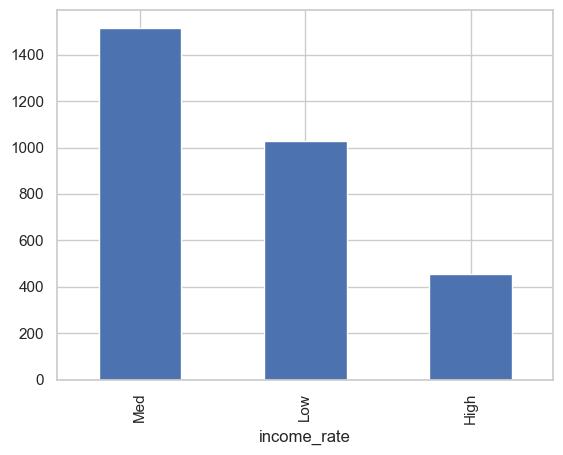

In [40]:
df['income_rate'].value_counts().plot(kind = 'bar')

In [41]:
categorical_cols = df[["brid","genderid","iaid","amount_of_credit_cards","nationality","occupation","fee_structure","loyalty_classification","properties_owned","risk_weighting","income_rate"]]

for col in categorical_cols:
    print(f"Value Counts for '{col}'")
    display(df[col].value_counts())

Value Counts for 'brid'


brid
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'genderid'


genderid
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'iaid'


iaid
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for 'amount_of_credit_cards'


amount_of_credit_cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'nationality'


nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'occupation'


occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'fee_structure'


fee_structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for 'loyalty_classification'


loyalty_classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for 'properties_owned'


properties_owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for 'risk_weighting'


risk_weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for 'income_rate'


income_rate
Med     1517
Low     1027
High     456
Name: count, dtype: int64

C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(


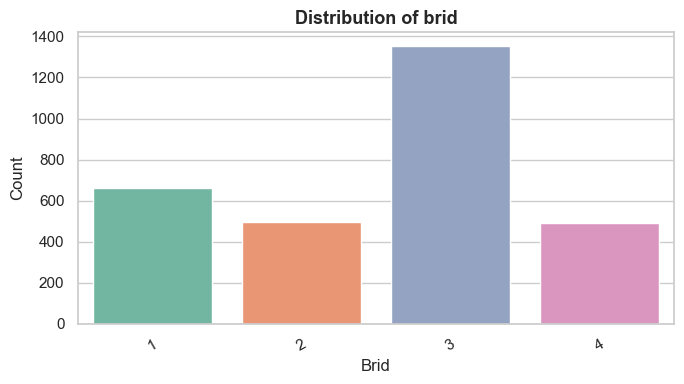

C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(


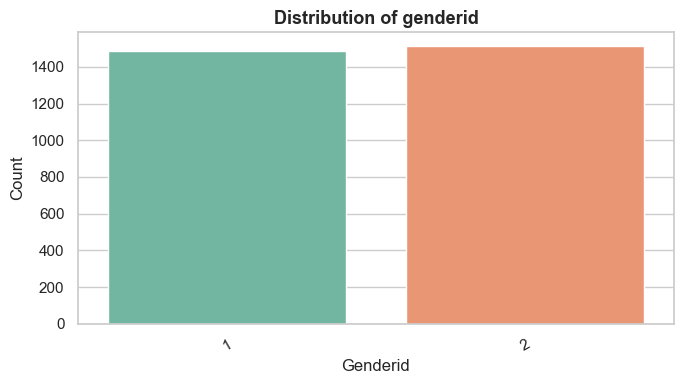

C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: UserWarning: 
The palette list has fewer values (8) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


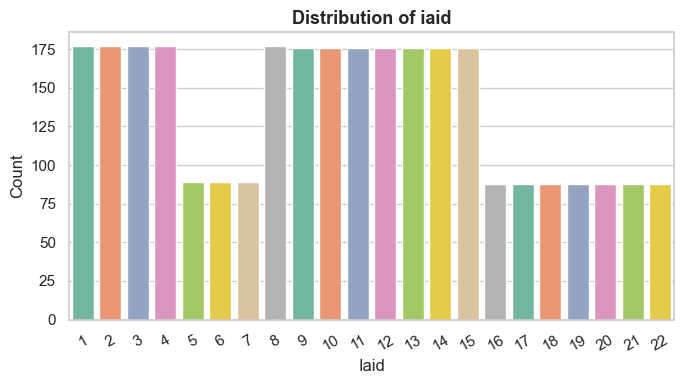

C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(


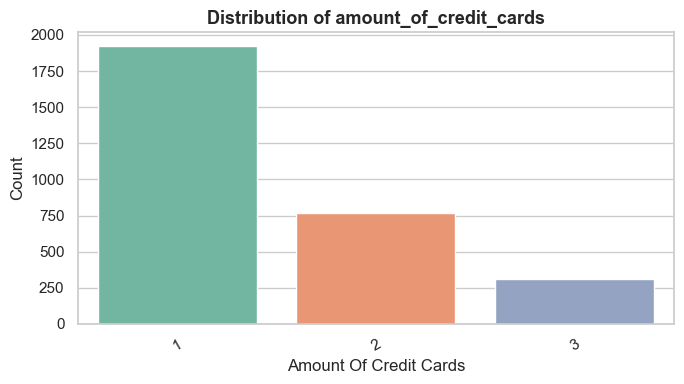

C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(


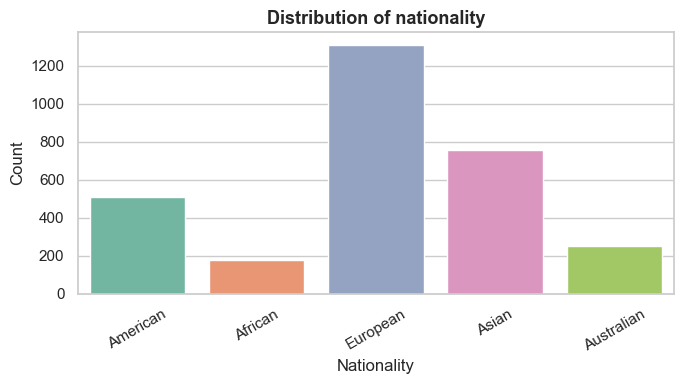

C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: UserWarning: 
The palette list has fewer values (8) than needed (195) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


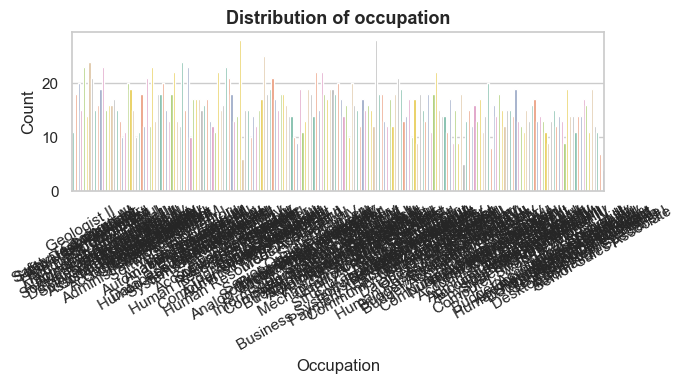

C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(


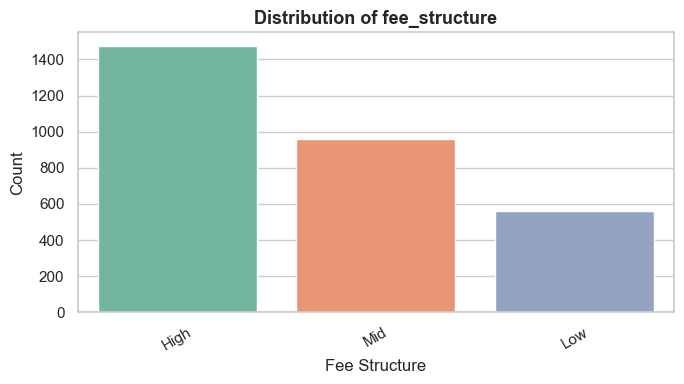

C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(


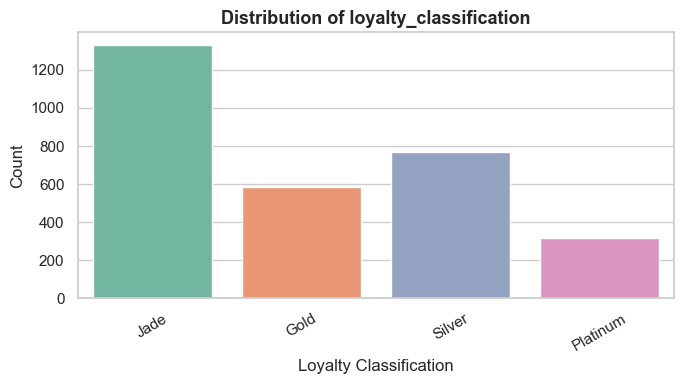

C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(


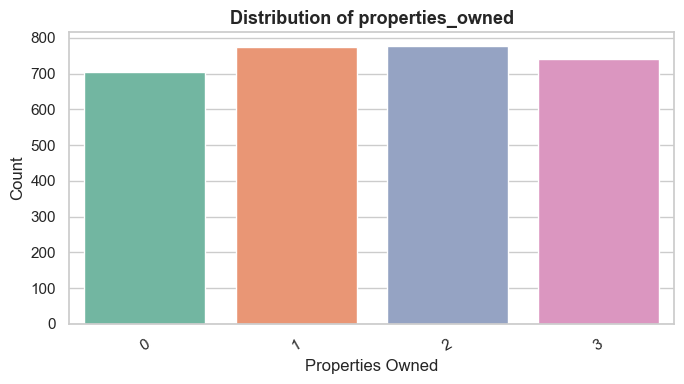

C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.countplot(


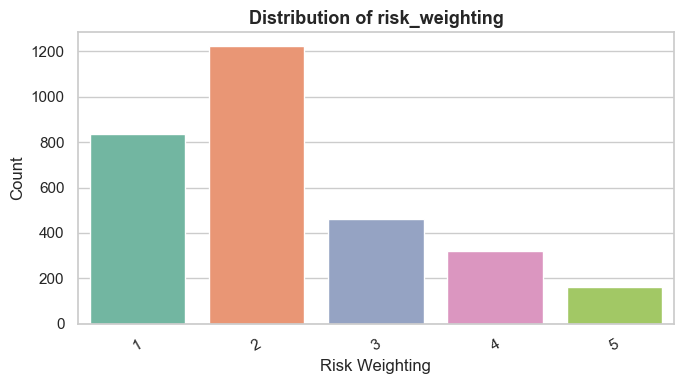

C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Erik\AppData\Local\Temp\ipykernel_12112\1059519089.py:16: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(


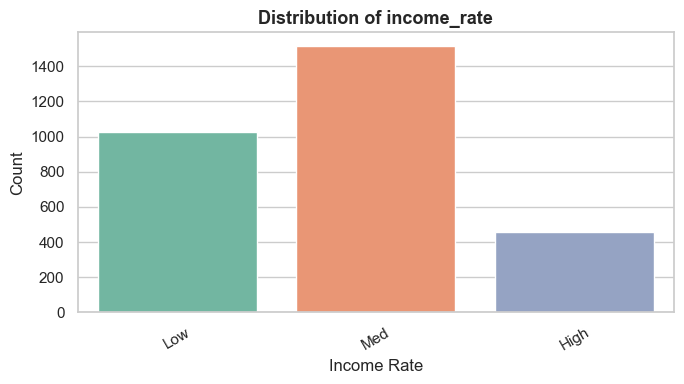

In [42]:

# Seaborn style
sns.set_theme(style="whitegrid")

predictors = [
    "brid","genderid","iaid","amount_of_credit_cards",
    "nationality","occupation","fee_structure",
    "loyalty_classification","properties_owned",
    "risk_weighting","income_rate"
]

sns.color_palette("muted")  # գեղեցիկ soft գույներ 🎨

for predictor in predictors:
    plt.figure(figsize=(7,4))
    
    sns.countplot(
        data=df,
        x=predictor,
        palette=palette
    )
    
    plt.title(f"Distribution of {predictor}", fontsize=13, fontweight="bold")
    plt.xlabel(predictor.replace("_", " ").title())
    plt.ylabel("Count")
    
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


In [43]:
df.columns

Index(['client_id', 'name', 'age', 'location_id', 'joined_bank',
       'banking_contact', 'nationality', 'occupation', 'fee_structure',
       'loyalty_classification', 'estimated_income', 'superannuation_savings',
       'amount_of_credit_cards', 'credit_card_balance', 'bank_loans',
       'bank_deposits', 'checking_accounts', 'saving_accounts',
       'foreign_currency_account', 'business_lending', 'properties_owned',
       'risk_weighting', 'brid', 'genderid', 'iaid', 'income_rate'],
      dtype='object')

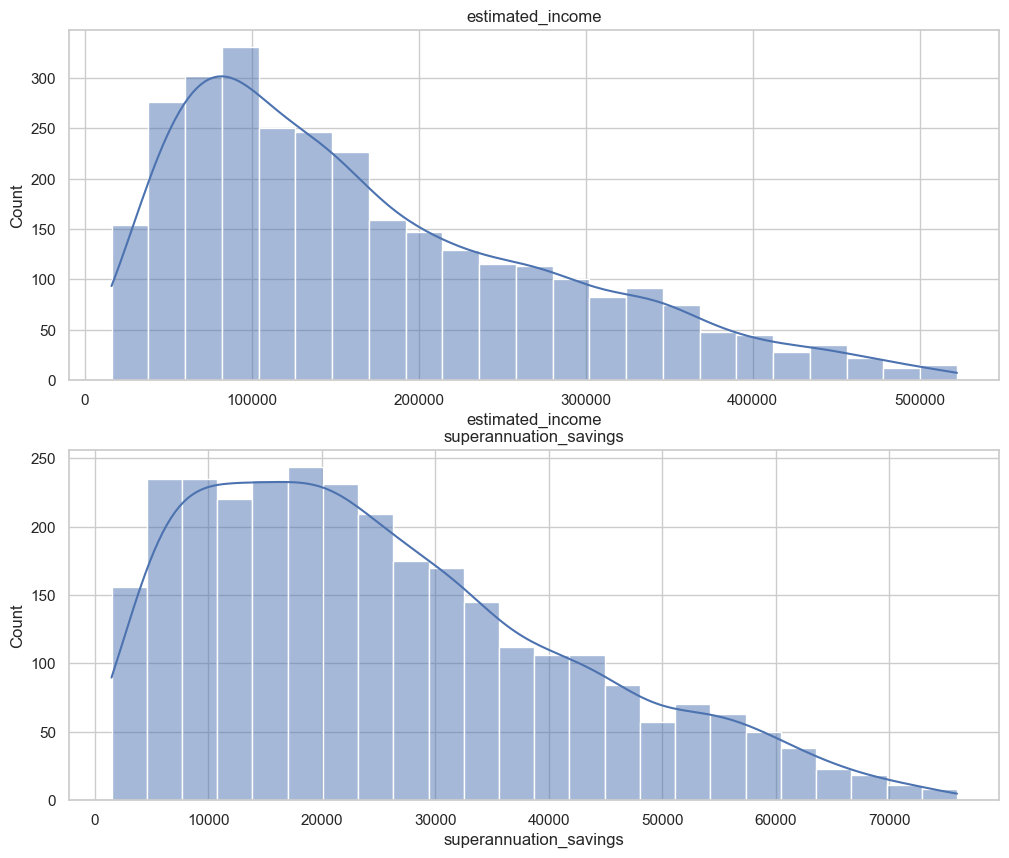

In [45]:
numerical_cols = ['estimated_income','superannuation_savings']

plt.figure(figsize =(12,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2,1,i+1)
    sns.histplot(df[col], kde = True)
    plt.title(col)
plt.show()    

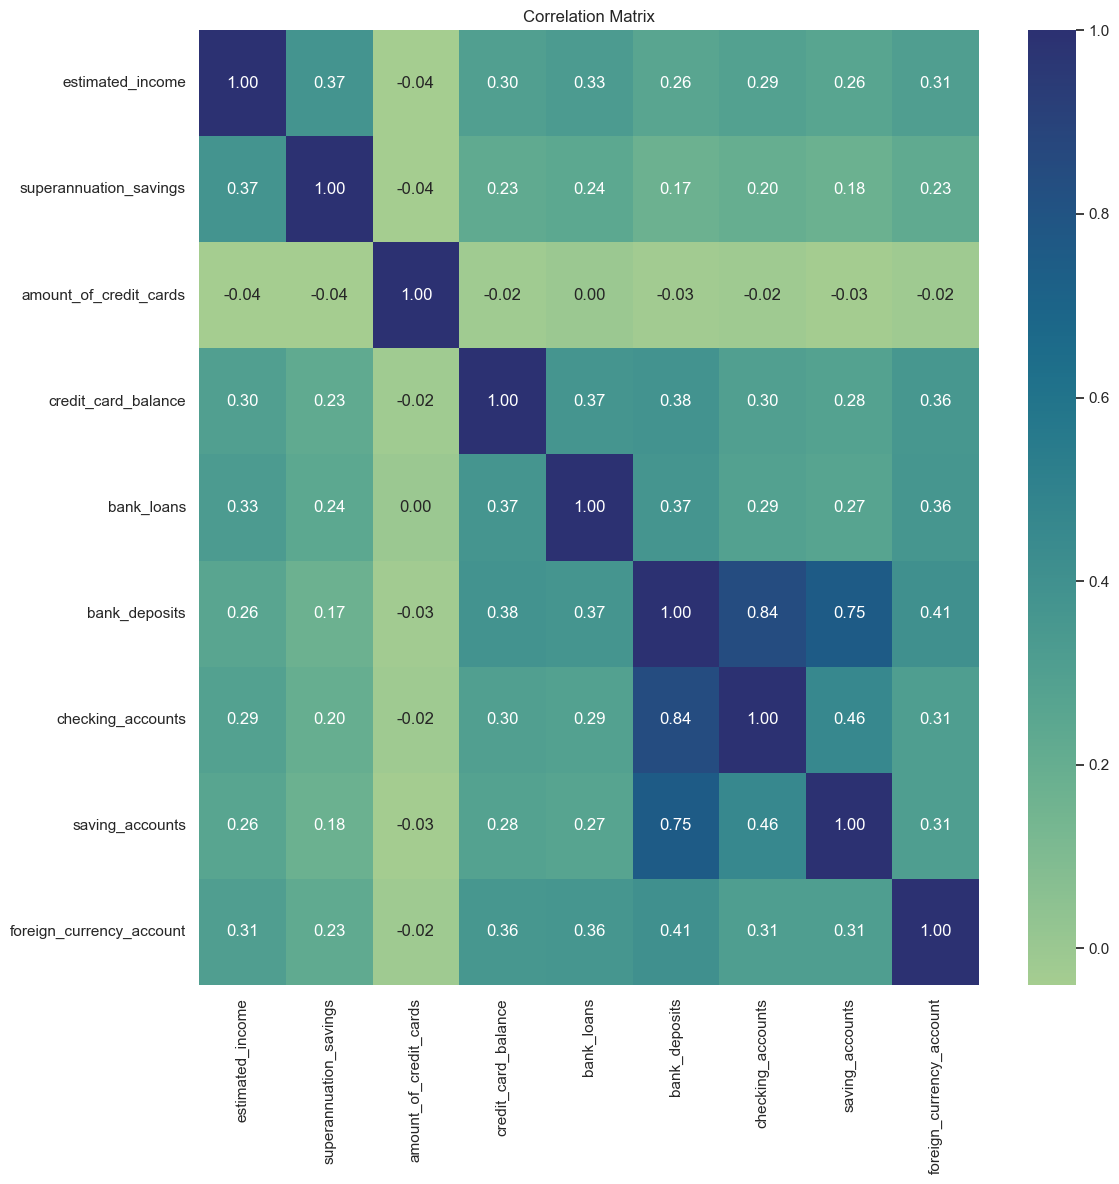

In [48]:
numerical_cols = [
    'estimated_income',
    'superannuation_savings',
    'amount_of_credit_cards',
    'credit_card_balance',
    'bank_loans',
    'bank_deposits',
    'checking_accounts',
    'saving_accounts',
    'foreign_currency_account'
]

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='crest',
    fmt=".2f"
)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
